# Class 8 - Solution Code

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, metrics, cross_validation, grid_search

%matplotlib inline

# Part 1: Intro to Classification
We'll be using the Iris dataset. Read more about the Iris dataset [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
# load dataset and convert to DF
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

# view data
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


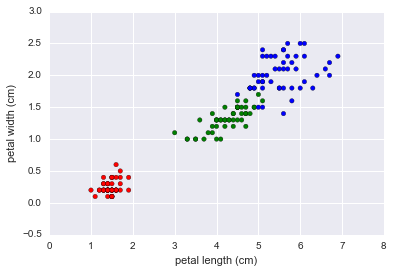

In [3]:
# apply a color map across the target (ground truth) species and plot
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)

Accuracy: 0.666666666667


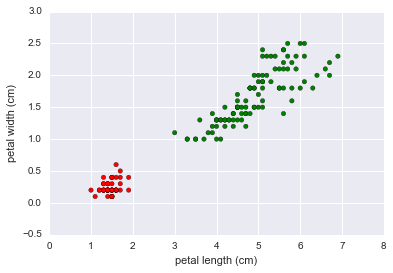

In [4]:
# build a simple classifier
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

# use simple classifier to make predictions
predictions = irisdf.apply(my_classifier, axis=1)
irisdf['predictions'] = predictions

# check accuracy of simple classifier
accuracy = float(sum(irisdf.target == irisdf.predictions))/len(irisdf)
print "Accuracy: " + str(accuracy)

# apply a color map across the predicted species and plot
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['cpredictions'] = irisdf.predictions.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.cpredictions)

### Improving the simple classifier

This solution is as simple it really needs to be in order to get a very good prediction score. But: Why, or when, does this fail? What attributes make this a great data set for learning classification algorithms? What makes it not as great?

Accuracy: 0.946666666667


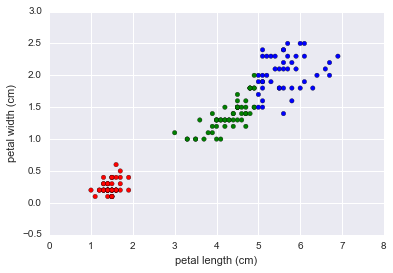

In [5]:
# improved simple classifier
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 5:
        return 1
    else:
        return 2

# use simple classifier to make predictions
predictions = irisdf.apply(my_classifier, axis=1)
irisdf['predictions'] = predictions

# calculate accuracy of improved classifier
accuracy = float(sum(irisdf.target == irisdf.predictions))/len(irisdf)
print "Accuracy: " + str(accuracy)

# apply a color map across the improved predicted species and plot
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['cpredictions'] = irisdf.predictions.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.cpredictions)

# Part 2: KNN Classifier

### Using distance: KNN implementation

API Docs for [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier)

In [6]:
# load dataset and convert to DF
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Accuracy: 0.966666666667


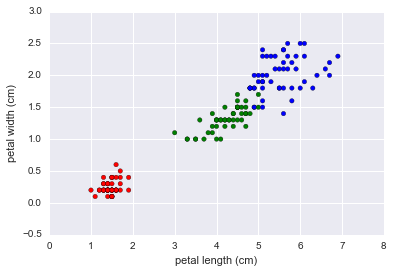

In [7]:
# select columns for X and y
X = irisdf[irisdf.columns.drop('target')]
y = iris.target

# train knn classifier using default params
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)

# use knn classifier to make predictions
predictions = knn.predict(X)
irisdf['predictions'] = predictions

# calculate accuracy of improved classifier
accuracy = knn.score(X, y)
print "Accuracy: " + str(accuracy)

# apply a color map across the improved predicted species and plot
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['cpredictions'] = irisdf.predictions.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.cpredictions)

### Check

1. Did the accuracy of the model improve from our simple model?

**Answer**: Yes, overall, the knn classifier performs better

2. Which data science best practice are we breaking here?

**Answer**: We are using the same data for training as testing!

3. Looking at the API docs, what is a parameter we can use to tune the performance of the knn model?

**Answer**: `n_neighbors`

# Part 3: Hyperparameter Tuning

API Docs for [sklearn.grid_search.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)

### Perform grid search for `n_neighbors`

In [8]:
# set list of values to grid search over
k = range(2, 100)
params = {'n_neighbors': k }

#set inputs
X = iris.data
y = iris.target

# perform grid search using list of values
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf)
gs.fit(X, y)

# get best value to use
print gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


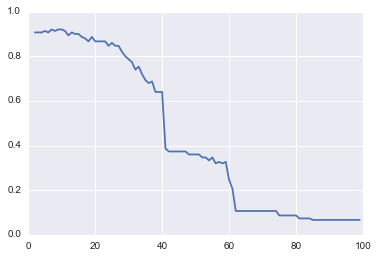

In [9]:
# plot search values vs. grid scores
plt.plot(k, [s[1] for s in gs.grid_scores_])

### Check

1. What is the best value to use for `n_neighbors`?

**Answer**: Use `n_neighbors=7`